In [12]:
!pip install scikit-fuzzy


In [13]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl



In [14]:
# Define the input variables
rainfall = ctrl.Antecedent(np.arange(0, 201, 1), 'rainfall')
temperature = ctrl.Antecedent(np.arange(0, 51, 1), 'temperature')
soil_fertility = ctrl.Antecedent(np.arange(0, 101, 1), 'soil_fertility')


In [15]:
# Define the output variable
crop_yield = ctrl.Consequent(np.arange(0, 101, 1), 'crop_yield')


In [16]:
# Define the fuzzy membership functions for rainfall
rainfall['low'] = fuzz.trimf(rainfall.universe, [0, 0, 100])
rainfall['medium'] = fuzz.trimf(rainfall.universe, [50, 100, 150])
rainfall['high'] = fuzz.trimf(rainfall.universe, [100, 200, 200])


In [17]:
# Define the fuzzy membership functions for temperature
temperature['low'] = fuzz.trimf(temperature.universe, [0, 0, 25])
temperature['medium'] = fuzz.trimf(temperature.universe, [15, 25, 35])
temperature['high'] = fuzz.trimf(temperature.universe, [25, 50, 50])


In [18]:
# Define the fuzzy membership functions for soil fertility
soil_fertility['poor'] = fuzz.trimf(soil_fertility.universe, [0, 0, 50])
soil_fertility['average'] = fuzz.trimf(soil_fertility.universe, [25, 50, 75])
soil_fertility['rich'] = fuzz.trimf(soil_fertility.universe, [50, 100, 100])


In [19]:
# Define the fuzzy membership functions for crop yield
crop_yield['low'] = fuzz.trimf(crop_yield.universe, [0, 0, 50])
crop_yield['medium'] = fuzz.trimf(crop_yield.universe, [25, 50, 75])
crop_yield['high'] = fuzz.trimf(crop_yield.universe, [50, 100, 100])


In [38]:
# Define the fuzzy rules
rule1 = ctrl.Rule(rainfall['low'] & temperature['medium'] & soil_fertility['poor'], crop_yield['low'])
rule2 = ctrl.Rule(rainfall['medium'] & temperature['low'] & soil_fertility['average'], crop_yield['medium'])
rule3 = ctrl.Rule(rainfall['high'] & temperature['high'] & soil_fertility['rich'], crop_yield['high'])
rule4 = ctrl.Rule(rainfall['high'] & temperature['medium'] & soil_fertility['average'], crop_yield['medium'])
rule5 = ctrl.Rule(rainfall['low'] & temperature['high'] & soil_fertility['rich'], crop_yield['low'])
rule6 = ctrl.Rule(rainfall['low'] & temperature['low'] & soil_fertility['poor'], crop_yield['low'])
rule7 = ctrl.Rule(rainfall['low'] & temperature['low'] & soil_fertility['average'], crop_yield['low'])
rule8 = ctrl.Rule(rainfall['low'] & temperature['low'] & soil_fertility['rich'], crop_yield['medium'])
rule9 = ctrl.Rule(rainfall['medium'] & temperature['medium'] & soil_fertility['poor'], crop_yield['medium'])
rule10 = ctrl.Rule(rainfall['medium'] & temperature['medium'] & soil_fertility['average'], crop_yield['medium'])

# Create the control system
crop_yield_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5,rule6,rule7,rule8,rule9,rule10])

In [39]:
# Create the control system
crop_yield_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5,rule6,rule7,rule8,rule9,rule10])


In [41]:
# Create a simulation
crop_yield_simulation = ctrl.ControlSystemSimulation(crop_yield_ctrl)


In [42]:
# Input values for prediction
crop_yield_simulation.input['rainfall'] = 120
crop_yield_simulation.input['temperature'] = 30
crop_yield_simulation.input['soil_fertility'] = 70


In [43]:
# Compute the result
crop_yield_simulation.compute()


In [44]:
# Output the result
print(f"Predicted Crop Yield: {crop_yield_simulation.output['crop_yield']}")


Predicted Crop Yield: 63.73563218390813


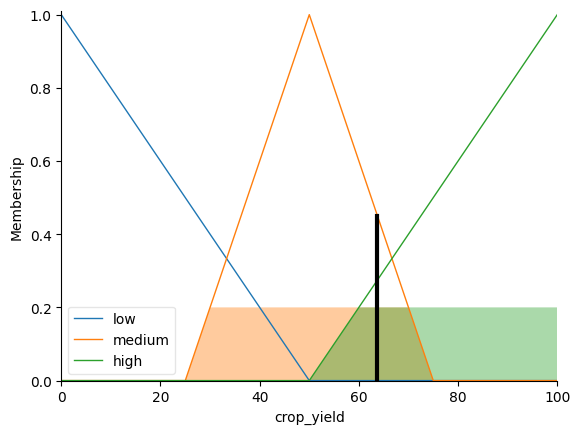

In [45]:
# Visualize the result
crop_yield.view(sim=crop_yield_simulation)

In [49]:
# Input values for prediction
crop_yield_simulation.input['rainfall'] = 150
crop_yield_simulation.input['temperature'] = 200
crop_yield_simulation.input['soil_fertility'] = 60

In [50]:
# Compute the result
crop_yield_simulation.compute()

# Output the result
print(f"Predicted Crop Yield: {crop_yield_simulation.output['crop_yield']}")

Predicted Crop Yield: 77.4074074074074


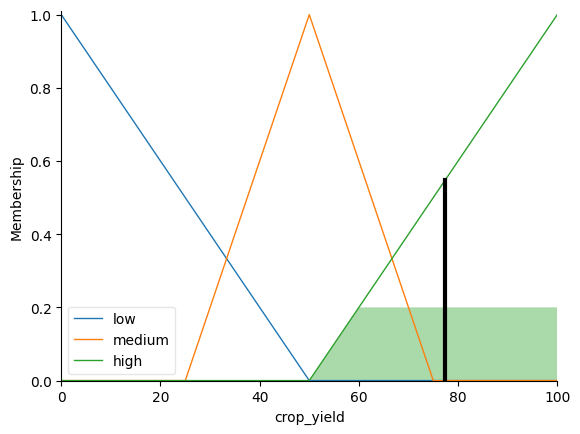

In [51]:
# Visualize the result
crop_yield.view(sim=crop_yield_simulation)

In [55]:
# Input values for prediction
crop_yield_simulation.input['rainfall'] = 50
crop_yield_simulation.input['temperature'] = 20
crop_yield_simulation.input['soil_fertility'] = 40

In [56]:
# Compute the result
crop_yield_simulation.compute()

# Output the result
print(f"Predicted Crop Yield: {crop_yield_simulation.output['crop_yield']}")

Predicted Crop Yield: 22.592592592592588


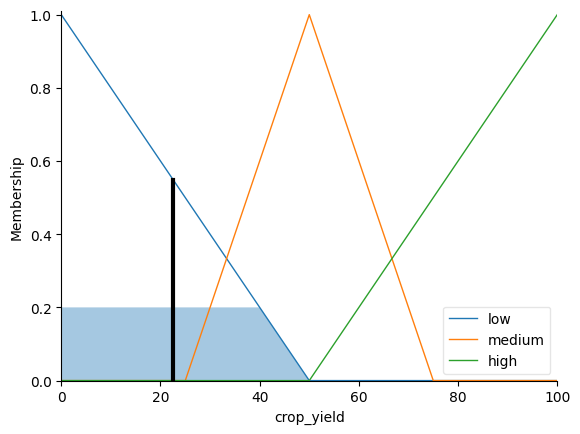

In [57]:
# Visualize the result
crop_yield.view(sim=crop_yield_simulation)